### **Multivariate Linear Regression**
1. Setting up environment
2. Load dataset
3. Explore the dataset
4. Data preparation
5. Assessing baseline
6. Training model with all numeric features/independent variables
7. Analysing the model's performance using validation dataset
8. Analysing the model's performance using test dataset

## **1. Setting up environment**

In [1311]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load dataset**

In [1312]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/mcyaputra/Files/main/cancer_us_county-training.csv')

## **3. Explore the dataset**

**3.1 First 10 columns of the dataset**

In [1313]:
df.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,88.000000,40,261.0,561.400000,29090,13352,26.8,2771.120431,"[22640, 34218.1]",39.8,39.2,40.5,"Jackson County, Kentucky",2.39,59.2,23.0,32.5,NaN,3.5,43.4,4.3,37.3,12.3,44.8,33.6,32.0,47.5,32.9,99.693045,0.044920,0.000000,0.000000,55.499459,6.838710,0
1,73.000000,35,167.3,345.600000,29782,21903,38.8,0.000000,"[22640, 34218.1]",32.3,30.8,35.2,"Willacy County, Texas",3.51,44.3,24.7,49.0,NaN,0.5,35.5,6.4,31.7,11.5,27.2,20.7,18.8,45.3,34.1,94.791383,1.649850,0.063631,2.854286,52.818296,4.799131,1
2,292.000000,124,191.0,468.400000,41955,48985,15.5,0.000000,"(40362.7, 42724.4]",42.2,40.9,43.8,"Henry County, Indiana",2.54,48.2,24.0,38.3,NaN,6.4,43.5,10.2,48.5,10.6,67.4,49.6,44.9,34.5,16.0,95.102348,1.741749,0.376429,0.445611,50.560800,3.996826,2
3,1962.667684,7,165.4,453.549422,55378,3007,11.1,0.000000,"(54545.6, 61494.5]",41.6,38.3,46.3,"Morton County, Kansas",2.53,54.2,21.1,51.0,21.7,6.2,32.5,10.6,57.1,5.8,70.9,56.8,49.6,30.1,15.2,85.833870,0.933677,0.160979,7.244044,52.565181,3.291536,3
4,43.000000,20,160.6,349.700000,26309,8551,35.3,0.000000,"[22640, 34218.1]",43.9,41.2,47.8,"Hancock County, Georgia",2.49,30.2,46.6,35.4,NaN,4.0,40.6,5.9,28.6,14.6,54.8,37.8,30.4,45.1,24.5,24.535525,73.223736,0.394100,1.396239,33.641208,3.166561,4
5,4139.000000,1292,120.1,392.900000,97279,1040116,7.2,184.594795,"(61494.5, 125635]",38.5,37.0,40.0,"Montgomery County, Maryland",2.76,53.2,12.7,23.5,44.0,19.9,14.0,26.6,67.1,6.1,77.0,64.7,56.4,23.0,11.5,55.626762,17.607940,14.561938,7.859930,53.702411,5.281995,5
6,1962.667684,36,153.9,453.549422,65373,23298,10.0,0.000000,"(61494.5, 125635]",34.7,34.7,34.6,"Pottawatomie County, Kansas",2.72,62.3,9.2,35.0,NaN,6.5,31.2,21.2,64.8,3.7,80.4,66.0,52.1,23.8,10.7,94.086188,1.290608,0.901657,0.685083,62.609863,8.095893,6
7,26.000000,14,174.1,334.700000,36627,5977,24.1,0.000000,"(34218.1, 37413.8]",38.2,37.4,38.6,"Crosby County, Texas",2.71,53.8,26.7,41.0,32.4,0.0,30.7,9.2,54.7,10.0,43.8,33.6,28.0,40.3,28.3,89.995006,3.878808,0.000000,3.712336,52.672453,4.238619,7
8,549.000000,234,213.2,493.100000,49044,113972,20.9,96.514933,"(48021.6, 51046.4]",35.2,34.4,36.0,"Terrebonne Parish, Louisiana",2.78,47.7,24.4,42.9,NaN,4.5,40.0,9.8,55.6,5.5,59.8,47.8,42.6,32.8,20.1,71.230775,18.534353,0.913590,0.777882,47.742354,5.230871,8
9,404.000000,134,150.9,480.700000,44148,63100,16.5,15.847861,"(42724.4, 45201]",42.9,40.9,44.0,"Herkimer County, New York",2.40,50.1,13.3,29.0,NaN,6.4,34.5,13.1,56.0,8.7,65.8,NaN,45.0,40.7,22.5,96.027111,0.997907,0.465378,0.501296,48.488328,4.741223,9


**3.2 List of columns**

In [1314]:
df.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'binnedInc',
       'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'Geography',
       'AvgHouseholdSize', 'PercentMarried', 'PctNoHS18_24', 'PctHS18_24',
       'PctSomeCol18_24', 'PctBachDeg18_24', 'PctHS25_Over',
       'PctBachDeg25_Over', 'PctEmployed16_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPrivateCoverageAlone', 'PctEmpPrivCoverage',
       'PctPublicCoverage', 'PctPublicCoverageAlone', 'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate', 'Id'],
      dtype='object')

**3.3 Number of rows and columns**

In [1315]:
df.shape

(2438, 35)

**3.4 Data types of each column**

In [1316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   TARGET_deathRate         2438 non-null   float64
 3   incidenceRate            2438 non-null   float64
 4   medIncome                2438 non-null   int64  
 5   popEst2015               2438 non-null   int64  
 6   povertyPercent           2438 non-null   float64
 7   studyPerCap              2438 non-null   float64
 8   binnedInc                2438 non-null   object 
 9   MedianAge                2438 non-null   float64
 10  MedianAgeMale            2438 non-null   float64
 11  MedianAgeFemale          2438 non-null   float64
 12  Geography                2438 non-null   object 
 13  AvgHouseholdSize         2438 non-null   float64
 14  PercentMarried          

**3.5 Statistical information of every columns**

In [1317]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
count,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2.438000e+03,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,612.000000,2438.000000,2438.000000,2438.000000,2316.000000,2438.000000,2438.000000,1938.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000,2438.000000
mean,587.171930,180.592699,178.848482,448.308247,47028.427810,9.851579e+04,16.854348,166.019192,45.313782,39.640853,42.214356,2.477259,51.770632,18.136505,35.115463,41.010621,6.111731,34.902994,13.234783,54.121805,7.867637,64.371452,48.453148,41.242453,36.275718,19.234824,83.776008,9.043586,1.230949,1.947961,51.216669,5.627447,1523.789171
std,1236.447895,438.473144,27.538452,53.247868,11919.386622,2.745272e+05,6.388398,563.813830,45.053173,5.217646,5.285603,0.432722,6.822147,7.997320,9.064684,11.054857,4.514472,7.018478,5.323185,8.313764,3.450552,10.566997,10.002029,9.366433,7.823347,6.094083,16.275962,14.361902,2.558111,3.541698,6.501254,1.966257,874.905673
min,6.000000,3.000000,66.300000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,23.100000,0.000000,0.000000,7.100000,0.000000,7.500000,2.500000,19.500000,0.400000,22.300000,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,0.000000
25%,76.000000,28.000000,161.400000,420.300000,38872.750000,1.154575e+04,12.100000,0.000000,37.800000,36.400000,39.100000,2.370000,47.700000,12.700000,29.400000,33.900000,3.100000,30.500000,9.400000,48.600000,5.500000,57.400000,41.000000,34.600000,30.925000,15.000000,77.341176,0.634412,0.247022,0.288937,47.826087,4.516355,775.250000
50%,172.500000,62.000000,178.100000,453.549422,45186.500000,2.694250e+04,15.900000,0.000000,41.000000,39.600000,42.400000,2.490000,52.400000,17.100000,34.900000,40.400000,5.350000,35.300000,12.300000,54.400000,7.600000,65.000000,48.600000,41.300000,36.400000,18.800000,90.121405,2.302054,0.550713,0.798971,51.662077,5.366485,1512.500000
75%,521.500000,151.000000,195.300000,481.975000,52492.500000,6.952450e+04,20.400000,92.562203,44.075000,42.500000,45.400000,2.630000,56.300000,22.500000,40.700000,46.700000,8.100000,39.700000,16.100000,60.400000,9.700000,72.000000,55.700000,47.600000,41.500000,23.100000,95.464864,10.452697,1.207158,2.106155,55.331622,6.458322,2279.750000
max,24965.000000,9445.000000,293.900000,1014.200000,125635.000000,5.238216e+06,47.400000,9762.308998,624.000000,64.700000,65.700000,3.970000,72.500000,59.100000,72.500000,79.000000,51.800000,54.800000,39.700000,80.100000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,42.619425,41.930251,78.075397,18.556701,3046.000000


**3.6 Correlation between variables**

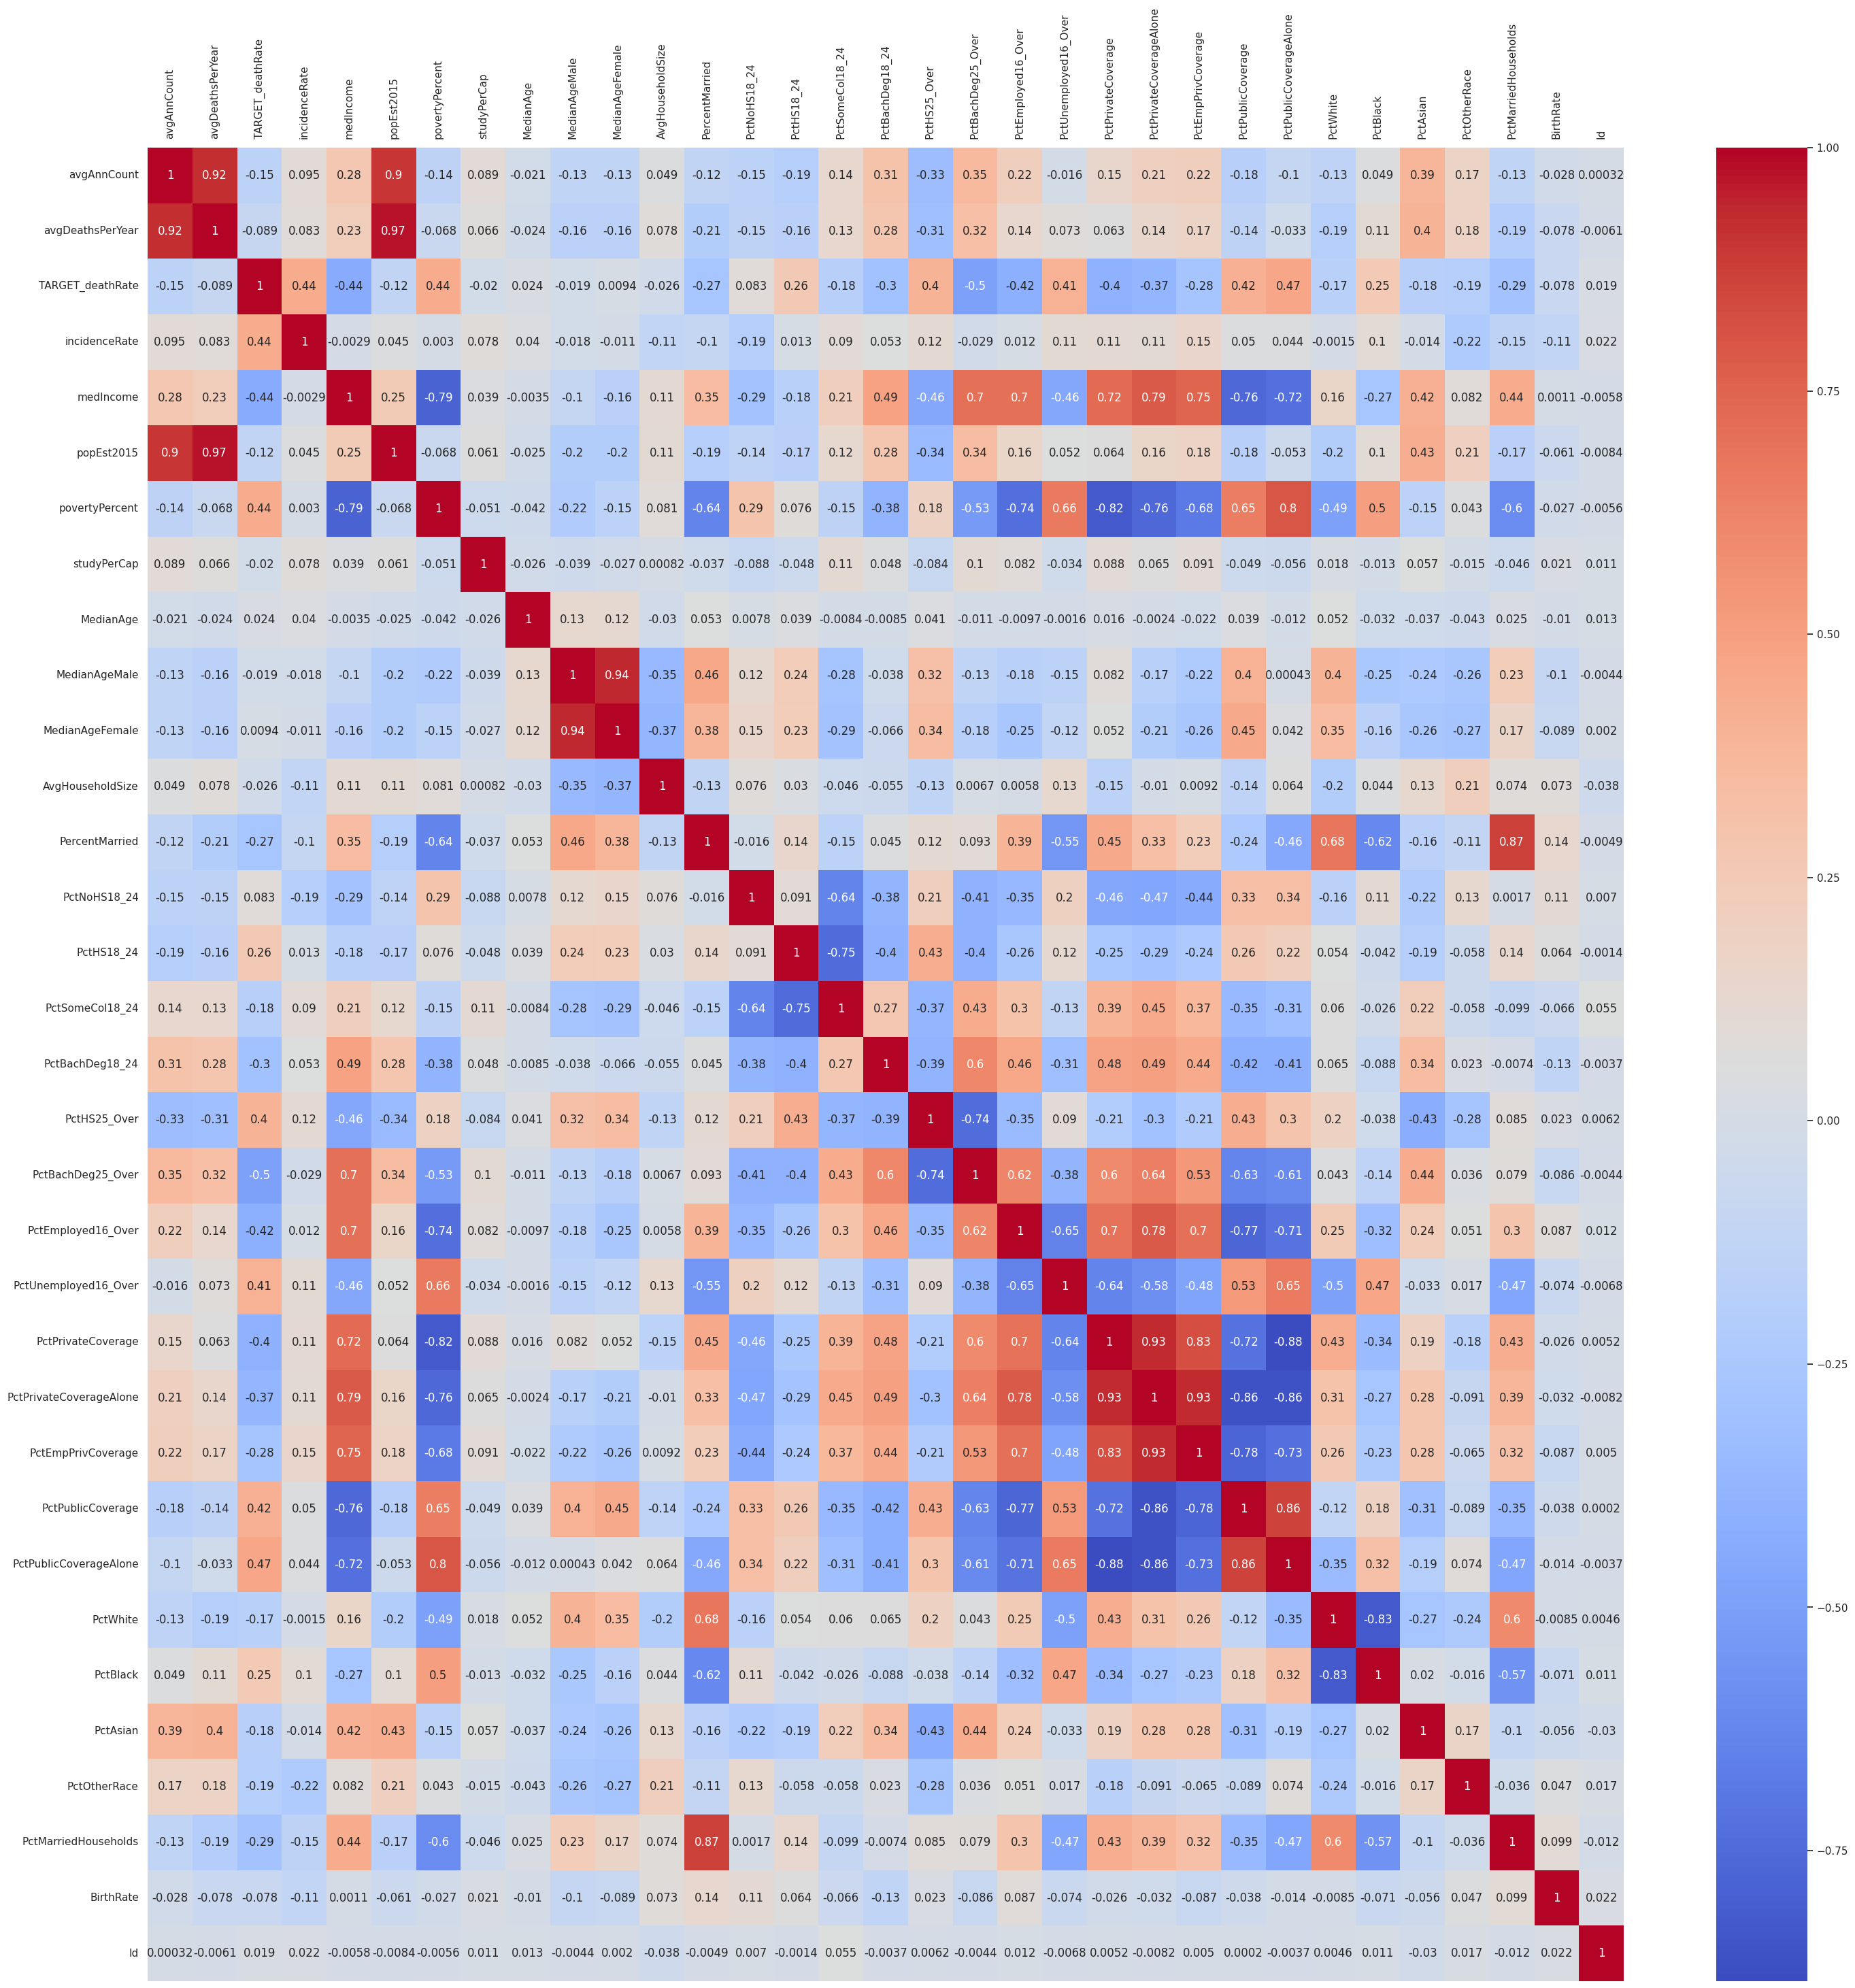

In [1318]:
sns.set(rc = {'figure.figsize':(35,35)})
ax = sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.tick_params(labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)

plt.show()

## **4. Data Preparation**

**4.1 Creating a copy of the dataframe**

In [1319]:
df_copy = df.copy()

### **Duplicate Values**

**4.2 Checking for duplicate values in 'Geography' and 'Id' columns**

In [1320]:
duplicate_rows = df_copy['Geography'].duplicated().sum()
duplicate_rows

0

In [1321]:
duplicate_rows = df_copy['Id'].duplicated().sum()
duplicate_rows

0

We are checking for duplicate values in these 2 columns because they are county identifiers so there should be no duplicate counties in the dataset

### **Non-numerical values**

**4.3 Dropping non numeric columns from the dataset**

In [1322]:
df_copy.drop(columns=['binnedInc', 'Geography'], inplace=True, axis=1)

**4.4 Showing current total rows and columns**

In [1323]:
df_copy.shape

(2438, 33)

### **Missing Values**

**4.5 Checking for total missing values in the dataset**

In [1324]:
df_copy.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1826
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          122
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     500
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRat

There are 3 columns with missing values, we will replace NaN values with its mean. We will first check if there are unusual values in those columns to make sure they don't skew the mean.

**4.6 Checking for unusual value (negative or more than 100%) in 'PctSomeCol18_24'**

In [1325]:
hist_plot1 = alt.Chart(df_copy).mark_bar(color='teal').encode(
    alt.X('PctSomeCol18_24', bin=True),
    y='count()'
)

hist_plot1

Output hidden; open in https://colab.research.google.com to view.

Values are between 0% and 80%, nothing unusual

**4.7 Checking for unusual value (negative or more than 100%) in 'PctEmployed16_Over'**

In [1326]:
hist_plot2 = alt.Chart(df_copy).mark_bar(color='teal').encode(
    alt.X('PctEmployed16_Over', bin=True),
    y='count()'
)

hist_plot2

Output hidden; open in https://colab.research.google.com to view.

Values are between 20% and 80%, nothing unusual

**4.8 Checking for unusual value (negative or more than 100%) in 'PctPrivateCoverageAlone'**

In [1327]:
hist_plot3 = alt.Chart(df_copy).mark_bar(color='teal').encode(
    alt.X('PctPrivateCoverageAlone', bin=True),
    y='count()'
)

hist_plot3

Output hidden; open in https://colab.research.google.com to view.

Values are between 0% and 80%, nothing unusual

**4.9 Replacing missing values in 'PctSomeCol18_24', 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns with their mean values**

In [1328]:
PctSomeCol18_24_mean = df_copy['PctSomeCol18_24'].mean()
df_copy['PctSomeCol18_24'] = df_copy['PctSomeCol18_24'].fillna(PctSomeCol18_24_mean)

PctEmployed16_Over_mean = df_copy['PctEmployed16_Over'].mean()
df_copy['PctEmployed16_Over'] = df_copy['PctEmployed16_Over'].fillna(PctEmployed16_Over_mean)

PctPrivateCoverageAlone_mean = df_copy['PctPrivateCoverageAlone'].mean()
df_copy['PctPrivateCoverageAlone'] = df_copy['PctPrivateCoverageAlone'].fillna(PctPrivateCoverageAlone_mean)


**4.10 Check if there are still any missing values in the dataset**

In [1329]:
df_copy.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

### **Outliers**

There are unusual outliers in 'MedianAge' columns, with values over 100 which might skew the outcome of our model

<Axes: xlabel='MedianAge'>

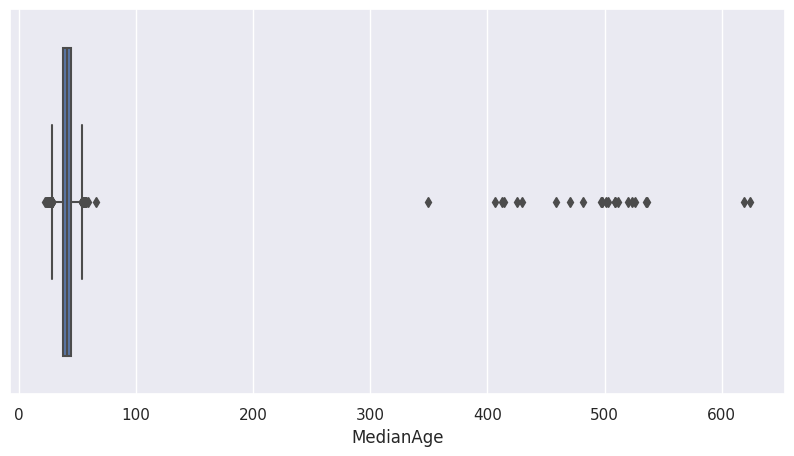

In [1330]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['MedianAge'])

**4.11 Dropping values in 'MedianAge' above 100**

In [1331]:
df_copy.drop(df_copy[df_copy['MedianAge'] > 100].index, inplace = True)

**4.12 Remaining rows and columns**

In [1332]:
df_copy.shape

(2414, 33)

**4.13 Checking the outliers of other features to see if they are logical**

<Axes: xlabel='medIncome'>

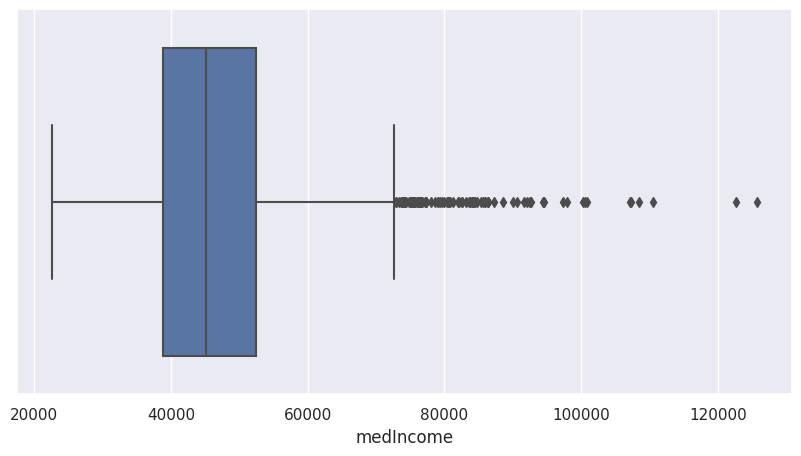

In [1333]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['medIncome'])

Outliers in median income is logical since some counties have much higher income per capita compare to others

<Axes: xlabel='studyPerCap'>

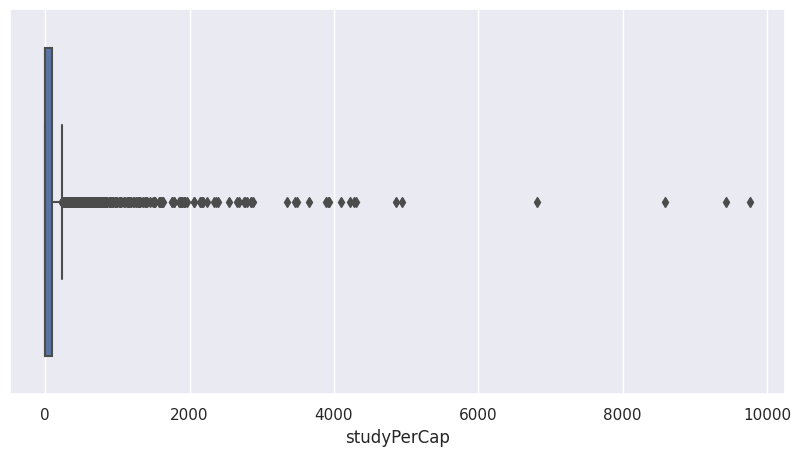

In [1334]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_copy['studyPerCap'])

Outliers in study per capita is logical since population between counties vary greatly, from hundreds to millions of residents

**4.14 Extract and assign target/dependant variable into a variable**

In [1335]:
y = df_copy.pop('TARGET_deathRate')

**4.15 Assign all features/independent variables into a variable**

In [1336]:
X = df_copy

**4.16 Import train_test_split from sklearn**

In [1337]:
from sklearn.model_selection import train_test_split

**4.17 Split target variable and features into training and validation datasets**

In [1338]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=3)

## **5. Assessing Baseline**

**5.1 Calculate mean value of the target variable**

In [1339]:
y_mean = y.mean()

**5.2 Assign mean value to a numpy array**

In [1340]:
y_base = np.full(y.shape, y_mean)

**5.3 Import MSE sklearn**

In [1341]:
from sklearn.metrics import mean_squared_error as mse

**5.4 RMSE score**

In [1342]:
print(mse(y, y_base, squared=False))

27.509377063040862


## **6. Training model with all numeric features/independent variables**

**6.1 Importing linear regression module from sklearn**

In [1343]:
from sklearn.linear_model import LinearRegression

**6.2 Assigning LinearRegression class to a variable**

In [1344]:
reg = LinearRegression()

**6.3 Training the model using dataset containing all numerical features**

In [1345]:
reg.fit(X_train, y_train)

LinearRegression()

**6.4 Using the model to predict the outcome of X_train**

In [1346]:
y_train_preds = reg.predict(X_train)

**6.5 RMSE score**

In [1347]:
print(mse(y_train, y_train_preds, squared=False))

18.648740599747416


**6.6 Visualising the model's prediction accuracy on training dataset in a line chart**

In [1348]:
perfect_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train})).mark_line(color='orange').encode(
    x='target',
    y='preds'
)

pred_chart_test = alt.Chart(pd.DataFrame({'target': y_train, 'preds': y_train_preds})).mark_line().encode(
    x='target',
    y='preds'
  )

perfect_test + pred_chart_test

alt.LayerChart(...)

## **7. Analysing the model's performance using validation dataset**

**7.1 Using the model to predict the outcome of X_valid**

In [1349]:
y_valid_preds = reg.predict(X_valid)

**7.2 RMSE score**

In [1350]:
print(mse(y_valid, y_valid_preds, squared=False))

19.946661539357375


**7.3 Visualising the model's prediction accuracy on validation dataset in a line chart**

In [1351]:
original = alt.Chart(pd.DataFrame({'target': y_valid, 'preds': y_valid})).mark_line(color='orange').encode(
    x='target',
    y='preds'
)

prediction = alt.Chart(pd.DataFrame({'target': y_valid, 'preds': y_valid_preds})).mark_line().encode(
    x='target',
    y='preds'
)

original + prediction

alt.LayerChart(...)

## **8. Analysing the model's performance using test dataset**

We will clean and prepare the test dataset the same way as what we did with training dataset

**8.1 Loading test dataset**

In [1352]:
df_test = pd.read_csv('https://raw.githubusercontent.com/mcyaputra/Files/main/cancer_us_county-testing.csv')

**8.2 First 10 columns of test dataset**

In [1353]:
df_test.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,Id
0,449.0,154,159.5,479.8,51880,104926,18.7,57.183158,"(51046.4, 54545.6]",30.2,28.5,31.8,"Tompkins County, New York",2.35,37.3,3.1,13.0,NaN,14.6,19.8,22.2,54.9,5.9,79.9,67.1,51.0,24.9,13.1,81.260411,4.154831,10.045737,0.876222,41.071243,4.367123,2553
1,340.0,140,167.2,438.5,55472,55423,12.4,0.000000,"(54545.6, 61494.5]",46.9,44.9,48.2,"Hood County, Texas",2.51,58.3,20.4,36.9,NaN,3.0,28.4,17.1,51.0,5.0,64.9,45.3,37.6,36.3,16.0,93.660078,0.818115,0.626281,3.116360,57.529142,6.844366,904
2,54.0,18,131.6,410.8,49380,10103,11.7,0.000000,"(48021.6, 51046.4]",49.4,49.4,49.4,"Valley County, Idaho",2.99,50.9,19.5,44.4,36.2,0.0,28.6,21.1,53.1,5.7,59.7,40.3,32.6,40.3,19.4,98.292181,0.041152,0.164609,0.051440,55.928482,1.604585,2192
3,94.0,46,189.4,403.8,45979,16708,13.5,598.515681,"(45201, 48021.6]",43.9,42.1,45.0,"Giles County, Virginia",2.32,50.7,14.6,31.3,NaN,4.8,40.0,9.5,NaN,4.8,68.7,49.5,45.1,33.1,13.3,96.090377,1.555569,0.715680,0.378541,48.409405,8.255410,1326
4,2718.0,1065,168.9,432.1,51527,726106,20.7,60.597213,"(51046.4, 54545.6]",33.5,32.4,34.6,"San Joaquin County, California",3.16,47.9,18.7,30.8,NaN,5.0,26.4,12.5,52.7,13.7,57.2,47.1,41.7,37.7,25.8,57.002148,7.093743,14.785464,11.692122,51.852122,6.148433,2394
5,9.0,3,130.6,349.8,43132,1683,15.4,0.000000,"(42724.4, 45201]",51.2,51.1,51.3,"McCone County, Montana",2.31,66.3,8.8,65.7,NaN,11.8,45.9,15.6,64.0,0.8,83.4,58.2,41.3,30.7,7.4,94.675926,0.000000,0.347222,0.000000,64.993216,8.620690,885
6,31.0,12,162.7,495.5,40979,3625,12.7,0.000000,"(40362.7, 42724.4]",47.5,45.5,49.0,"Webster County, Nebraska",2.31,57.2,28.0,31.1,NaN,3.5,36.1,12.9,56.7,4.7,69.1,50.4,38.5,38.3,17.7,95.536922,0.054098,1.379497,0.513930,54.252577,3.524229,1336
7,38.0,17,153.9,388.8,48125,6524,11.7,0.000000,"(48021.6, 51046.4]",43.8,42.2,45.0,"Spink County, South Dakota",2.41,54.0,24.9,39.7,NaN,6.8,36.4,17.1,NaN,1.1,69.9,53.8,36.4,34.9,18.3,95.783866,0.426180,0.000000,1.065449,50.969213,7.280000,1818
8,796.0,319,176.4,444.3,45080,155056,16.2,83.840677,"(42724.4, 45201]",40.8,39.4,41.9,"Catawba County, North Carolina",2.59,51.7,14.7,34.4,NaN,9.6,30.3,14.6,56.9,8.2,65.0,50.9,43.6,33.6,18.5,80.991527,8.580299,3.795356,4.601255,52.050613,4.107398,845
9,73.0,25,155.5,448.1,61976,20862,11.6,0.000000,"(61494.5, 125635]",30.2,30.5,30.0,"Duchesne County, Utah",2.94,65.0,25.7,42.1,NaN,1.5,36.0,11.0,57.3,5.2,73.1,62.6,56.9,19.9,9.4,91.017813,0.171570,0.499571,1.745976,65.758401,10.013381,384


**8.3 Total rows and columns of test dataset**

In [1354]:
df_test.shape

(609, 35)

### **Duplicate values**

**8.4 Checking for duplicate values in 'Geography' and 'Id' columns**

In [1355]:
duplicate_rows = df_test['Geography'].duplicated().sum()
duplicate_rows

0

In [1356]:
duplicate_rows = df_test['Id'].duplicated().sum()
duplicate_rows

0

We are checking for duplicate values in these 2 columns because they are county identifiers so there should be no duplicate counties in the dataset

### **Non-numerical values**

**8.5 Dropping non numeric features**

In [1357]:
df_test.drop(columns=['binnedInc', 'Geography'], inplace=True, axis=1)

**8.6 Showing current total rows and columns**

In [1358]:
df_test.shape

(609, 33)

### **Missing values**

**8.7 Checking for missing values in test dataset**

In [1359]:
df_test.isna().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            459
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          30
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    109
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarriedHouseholds         0
BirthRate                    0
Id      

**8.8 Checking for unusual value (negative or more than 100%) in 'PctSomeCol18_24'**

In [1360]:
hist_plot4 = alt.Chart(df_test).mark_bar(color='teal').encode(
    alt.X('PctSomeCol18_24', bin=True),
    y='count()'
)

hist_plot4

alt.Chart(...)

Values are between 0% and 80%, nothing unusual

**8.9 Checking for unusual value (negative or more than 100%) in 'PctEmployed16_Over'**

In [1361]:
hist_plot5 = alt.Chart(df_test).mark_bar(color='teal').encode(
    alt.X('PctEmployed16_Over', bin=True),
    y='count()'
)

hist_plot5

alt.Chart(...)

Values are between 0% and 80%, nothing unusual

**8.10 Checking for unusual value (negative or more than 100%) in 'PctPrivateCoverageAlone'**

In [1362]:
hist_plot6 = alt.Chart(df_test).mark_bar(color='teal').encode(
    alt.X('PctPrivateCoverageAlone', bin=True),
    y='count()'
)

hist_plot6

alt.Chart(...)

Values are between 20% and 80%, nothing unusual

**8.11 Replacing missing values in 'PctSomeCol18_24', 'PctEmployed16_Over' and 'PctPrivateCoverageAlone' columns with their mean values**

In [1363]:
PctSomeCol18_24_mean = df_test['PctSomeCol18_24'].mean()
df_test['PctSomeCol18_24'] = df_test['PctSomeCol18_24'].fillna(PctSomeCol18_24_mean)

PctEmployed16_Over_mean = df_test['PctEmployed16_Over'].mean()
df_test['PctEmployed16_Over'] = df_test['PctEmployed16_Over'].fillna(PctEmployed16_Over_mean)

PctPrivateCoverageAlone_mean = df_test['PctPrivateCoverageAlone'].mean()
df_test['PctPrivateCoverageAlone'] = df_test['PctPrivateCoverageAlone'].fillna(PctPrivateCoverageAlone_mean)

**8.12 Check if there are still any missing values in the dataset**

In [1364]:
df_test.isna().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
Id                         0
dtype: int64

### **Outliers**

**8.13 There are unusual outliers in 'MedianAge' columns, with values over 100**

<Axes: xlabel='MedianAge'>

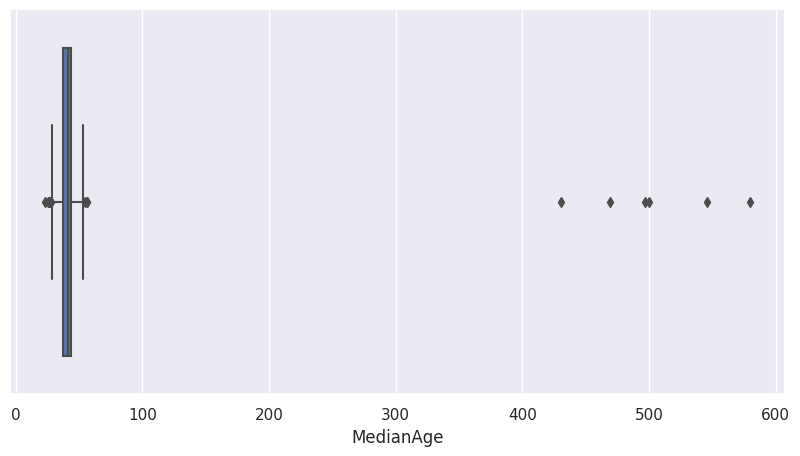

In [1365]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_test['MedianAge'])

**8.14 Dropping values in 'MedianAge' above 100**

In [1366]:
df_test.drop(df_test[df_test['MedianAge'] > 100].index, inplace = True)

**8.15 Remaining rows and columns**

In [1367]:
df_test.shape

(603, 33)

**8.16 Extract and assign target/dependant variable into a variable**

In [1368]:
y_test = df_test.pop('TARGET_deathRate')

**8.17 Assign all features/independent variables into a variable**

In [1369]:
X_test = df_test

**8.18 Using the model to predict the outcome of X_test**

In [1370]:
y_test_preds = reg.predict(X_test)

**8.19 RMSE score**

In [1371]:
print(mse(y_test, y_test_preds, squared=False))

20.61260031305617


**8.20 Visualising the model's prediction accuracy on test dataset in a line chart**

In [1372]:
original2 = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test})).mark_line(color='orange').encode(
    x='target',
    y='preds'
)

prediction2 = alt.Chart(pd.DataFrame({'target': y_test, 'preds': y_test_preds})).mark_line().encode(
    x='target',
    y='preds'
)

original2 + prediction2

alt.LayerChart(...)